In [ ]:
#Instalando módulo necessária para a análise
!pip install lifelines==0.26.3

In [171]:
#Versão do Python
!python3 --version

Python 3.9.9


In [1]:
#Importando módulos para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter

In [180]:
#Versões utilizadas
print("Pandas: " + pd.__version__)
print("Numpy: " + np.__version__)
print("Seaborn: " + sb.__version__)
print("Matplotlib: " + matplotlib.__version__)
print("Lifelines: 0.26.3")

Pandas: 1.1.3
Numpy: 1.19.2
Seaborn: 0.11.0
Matplotlib: 3.3.2
Lifelines: 0.26.3


In [2]:
#Configurações para as plotagens
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Configurações do dataframe

#Removendo limite máximo de colunas para vizualização
pd.options.display.max_columns = None

In [36]:
#Importando o dataset
df_info_assinatura = pd.read_csv('Data/CustomerChurn.csv', sep=';')
df_info_cons = pd.read_csv('Data/CustomerChurnInfos.csv', sep=';')

In [116]:
#Fazendo o cruzamento das informações
df = pd.merge(df_info_assinatura, df_info_cons[['Customer ID','Country','State', 'Gender', 'Churn Reason', 'CLTV']], how="left", on=["Customer ID"])

In [40]:
#Checando se o read_csv ocorreu da maneira correta
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn,Country,State,Gender,Churn Reason,CLTV
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No,United States,California,Female,NaN,3964
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No,United States,California,Male,NaN,3441
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,United States,California,Male,Competitor made better offer,3239
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No,United States,California,Male,NaN,4307
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,United States,California,Female,Moved,2701


<h3>Dataprep</h3><br/><h4>Tratamento dos dados

In [117]:
#Listando todas as colunas
df.columns

Index(['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn',
       'Country', 'State', 'Gender', 'Churn Reason', 'CLTV'],
      dtype='object')

In [118]:
#Renomeando todas as colunas para Português
depara = {
          'Senior Citizen':'Idoso', 
          'Partner':'Possui_parceiro', 
          'Dependents':'Possui_dependentes',
          'Tenure':'Meses_relacionamento',
          'Phone Service':'Possui_telefonia',
          'Multiple Lines':'Multipla_linha_tel',
          'Internet Service':'Provedor_internet',
          'Online Security':'Possui_seguranca_online',
          'Online Backup':'Possui_backup_online',
          'Device Protection':'Possui_seguro_dispositivo',
          'Tech Support':'Usou_suporte_tecnico',
          'Streaming TV':'Assinatura_TV',
          'Streaming Movies':'Assinatura_Filmes',
          'Contract':'Tipo_contrato',
          'Paperless Billing':'Fatura_digital',
          'Payment Method':'Meio_pagamento',
          'Monthly Charges':'Preco_mensal',
          'Total Charges':'Preco_total',
          'Churn':'Churn',
          'Churn Reason':'Motivo do Churn',
          'Gender':'Genero',
          'Country':'Pais',
          'State':'Estado',
         }
df.rename(columns = depara, inplace = True)

In [119]:
#Binarizando variáveis que serão utilizadas
def dummy_var(col):
    df.loc[df[col] == 'Yes', [col]] = 1
    df.loc[df[col] == 'No', [col]] = 0

dummy_var('Idoso')
dummy_var('Churn')

In [113]:
#Checando volumetria do dataframe
df.shape

(7043, 26)

In [120]:
#Troca , para .
df["Preco_mensal"]=df["Preco_mensal"].str.replace(',','.')
df["Preco_total"]=df["Preco_total"].str.replace(',','.')

In [125]:
#Converte para numérico
df['Preco_mensal']=pd.to_numeric(df['Preco_mensal'])
df['Preco_total']=pd.to_numeric(df['Preco_total'], errors='coerce')

In [163]:
#Removendo colunas que ão serão necessárias
df.drop(['LoyaltyID', 'Customer ID'], axis=1, inplace=True)

In [164]:
df.dtypes

Idoso                         object
Possui_parceiro               object
Possui_dependentes            object
Meses_relacionamento           int64
Possui_telefonia              object
Multipla_linha_tel            object
Provedor_internet             object
Possui_seguranca_online       object
Possui_backup_online          object
Possui_seguro_dispositivo     object
Usou_suporte_tecnico          object
Assinatura_TV                 object
Assinatura_Filmes             object
Tipo_contrato                 object
Fatura_digital                object
Meio_pagamento                object
Preco_mensal                 float64
Preco_total                  float64
Churn                         object
Pais                          object
Estado                        object
Genero                        object
Motivo do Churn               object
CLTV                           int64
dtype: object

<h3>Plots</h3><br/><h4>Visualização dos dados

<AxesSubplot:title={'center':'Histograma do tempo de relacionamento'}, ylabel='Frequency'>

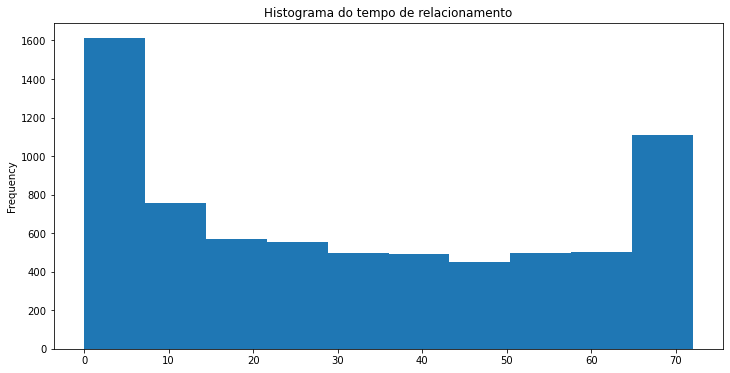

In [46]:
#Histograma do tempo de relacionamento
plt.title('Histograma do tempo de relacionamento')
df['Meses_relacionamento'].plot(kind='hist')

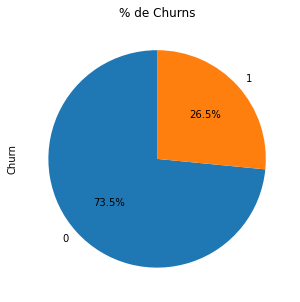

In [47]:
#% de Churns
plt.title('% de Churns')
df_plot = df.groupby(['Churn'])['Churn'].count()
df_plot.plot.pie(y='Churn',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

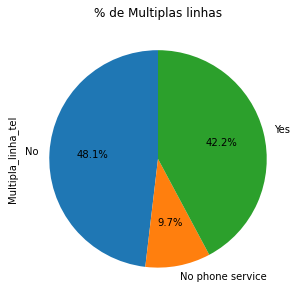

In [48]:
#% de Multiplas linhas
plt.title('% de Multiplas linhas')
df_plot = df.groupby(['Multipla_linha_tel'])['Multipla_linha_tel'].count()
df_plot.plot.pie(y='Multipla_linha_tel',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

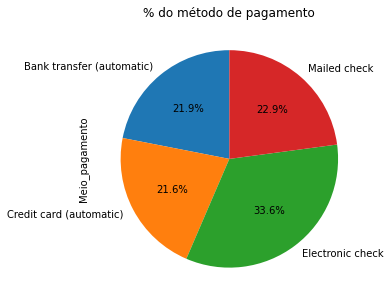

In [49]:
#% do método de pagamento
plt.title('% do método de pagamento')
df_plot = df.groupby(['Meio_pagamento'])['Meio_pagamento'].count()
df_plot.plot.pie(y='Meio_pagamento',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

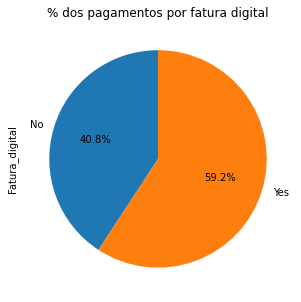

In [50]:
#% dos pagamentos por fatura digital
plt.title('% dos pagamentos por fatura digital')
df_plot = df.groupby(['Fatura_digital'])['Fatura_digital'].count()
df_plot.plot.pie(y='Fatura_digital',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

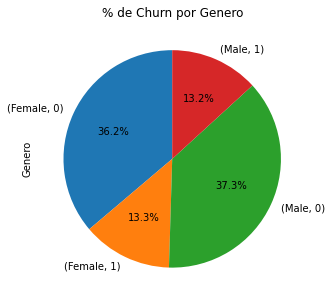

In [54]:
#% de Churn por Genero
plt.title('% de Churn por Genero')
df_plot = df.groupby(['Genero','Churn'])['Genero'].count()
df_plot.plot.pie(y='Genero',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

<h3>Utilizando Kaplan-Meier</h3><br/><h4>Estimando a probabilidade de sobrevivência de relacionamento ao longo do tempo

C:\Users\gabri\anaconda3\lib\site-packages\lifelines\utils\__init__.py:1181: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 1.0, 'Curva de sobrevivência utilizando Kaplan-Meier')

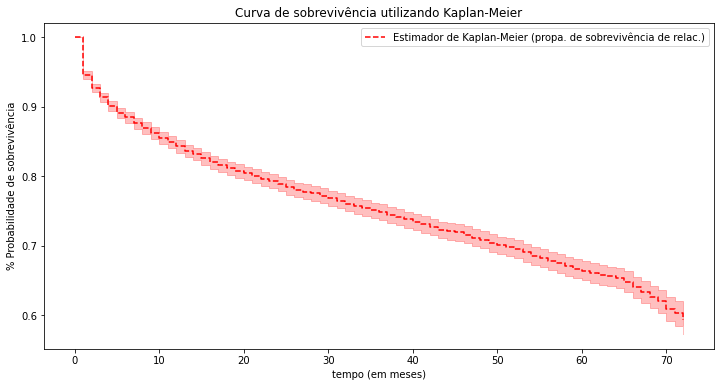

In [170]:
tempo = df['Meses_relacionamento']
target = df['Churn']

kmf = KaplanMeierFitter() ## instantiate the class to create an object
kmf.fit(tempo, target,label='Estimador de Kaplan-Meier (propa. de sobrevivência de relac.)')

ax = kmf.plot(linestyle="--",color='red')
ax.set_xlabel("tempo (em meses)")
ax.set_ylabel("% Probabilidade de sobrevivência")
ax.set_title('Curva de sobrevivência utilizando Kaplan-Meier')


<h3>Utilizando Regressão de Cox</h3><br/><h4>Para identificação dos principais ofensores para o relacionamento

In [157]:
df_= df.loc[:,['Meses_relacionamento','Churn','Genero','Possui_telefonia',
               'Assinatura_TV','Idoso','Possui_parceiro',
               'Possui_dependentes','Preco_mensal', 'Meio_pagamento']]

df_binario = pd.get_dummies(df_, drop_first=True)
df_binario.head()

,Meses_relacionamento,Preco_mensal,Churn_1,Genero_Male,Possui_telefonia_Yes,Assinatura_TV_No internet service,Assinatura_TV_Yes,Idoso_1,Possui_parceiro_Yes,Possui_dependentes_Yes,Meio_pagamento_Credit card (automatic),Meio_pagamento_Electronic check,Meio_pagamento_Mailed check
0,1,29.85,0,0,0,0,0,0,1,0,0,1,0
1,34,56.95,0,1,1,0,0,0,0,0,0,0,1
2,2,53.85,1,1,1,0,0,0,0,0,0,0,1
3,45,42.30,0,1,0,0,0,0,0,0,0,0,0
4,2,70.70,1,0,1,0,0,0,0,0,0,1,0


In [159]:
cphf = CoxPHFitter()
cphf.fit(df_binario, duration_col='Meses_relacionamento', event_col='Churn_1', show_progress=True)
cphf.print_summary()

Iteration 1: norm_delta = 1.19190, step_size = 0.9000, log_lik = -15653.03964, newton_decrement = 773.62034, seconds_since_start = 0.0
Iteration 2: norm_delta = 0.22906, step_size = 0.9000, log_lik = -14918.51760, newton_decrement = 25.93903, seconds_since_start = 0.0
Iteration 3: norm_delta = 0.04399, step_size = 0.9000, log_lik = -14892.26309, newton_decrement = 0.83311, seconds_since_start = 0.0
Iteration 4: norm_delta = 0.00226, step_size = 1.0000, log_lik = -14891.40788, newton_decrement = 0.00162, seconds_since_start = 0.0
Iteration 5: norm_delta = 0.00001, step_size = 1.0000, log_lik = -14891.40626, newton_decrement = 0.00000, seconds_since_start = 0.0
Convergence success after 5 iterations.


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'Meses_relacionamento'
                event col = 'Churn_1'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -14891.41
         time fit was run = 2021-11-21 19:26:09 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
Preco_mensal                            -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
Genero_Male                             -0.02       0.98       0.05            -0.11             0.07                 0.89                 1.07
Possui_telefonia_Yes                     0.74       2.11       0.11             0.54             0.95                 1.71                 2.59
Assinatura_TV_No internet service       -2.01       0.13       0.13            -2.27            -1.75                 0.10                 0.17
Assinatura_TV_Yes                       -0.19       0.83       0.06            -0.31            -0.07                 0.73                 0.93
Idoso_1                                  0.29       1.34       0.06             0.18             0.40                 1.20                 1.49
Possui_parceiro_Yes                     -0.73       0.48       0.05            -0.84            -0.63                 0.43                 0.53
Possui_dependentes_Yes                  -0.29       0.75       0.07            -0.43            -0.16                 0.65                 0.85
Meio_pagamento_Credit card (automatic)  -0.09       0.91       0.09            -0.27             0.08                 0.76                 1.09
Meio_pagamento_Electronic check          1.25       3.50       0.07             1.11             1.39                 3.04                 4.02
Meio_pagamento_Mailed check              0.72       2.06       0.09             0.55             0.89                 1.73                 2.44

                                            z      p   -log2(p)
covariate                                                      
Preco_mensal                            -7.03 <0.005      38.79
Genero_Male                             -0.50   0.62       0.70
Possui_telefonia_Yes                     7.00 <0.005      38.54
Assinatura_TV_No internet service      -14.96 <0.005     165.60
Assinatura_TV_Yes                       -3.06 <0.005       8.81
Idoso_1                                  5.25 <0.005      22.67
Possui_parceiro_Yes                    -13.48 <0.005     135.17
Possui_dependentes_Yes                  -4.29 <0.005      15.79
Meio_pagamento_Credit card (automatic)  -1.03   0.30       1.72
Meio_pagamento_Electronic check         17.65 <0.005     229.21
Meio_pagamento_Mailed check              8.27 <0.005      52.73
---
Concordance = 0.76
Partial AIC = 29804.81
log-likelihood ratio test = 1523.27 on 11 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

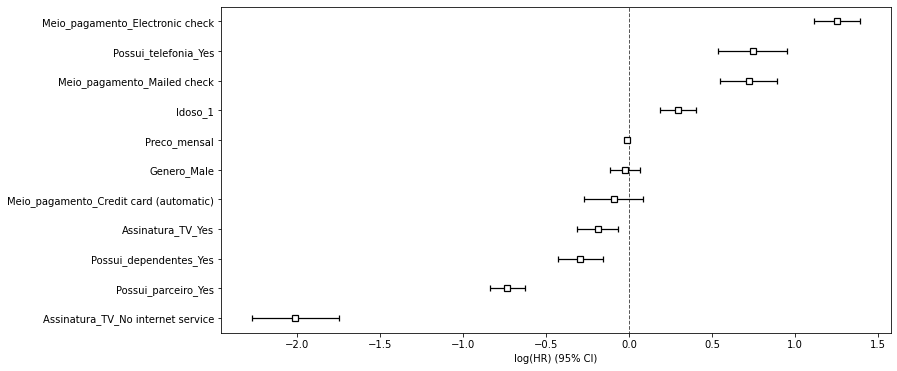

In [168]:
ax.set_title('Coeficientes e intervalos de confiança')
cphf.plot()